In [2]:
cd /data/store01/data_dirs/students/ucfafyi/S2_MODIS

/data/store01/data_dirs/students/ucfafyi/S2_MODIS


In [3]:
import os
import sys
sys.path.insert(0,'python')
from PSF_optimization import *
from fastRWpkl import *
from get_wrs import *
from linear_plot import *
from smoothn import *
plot_config()
import pylab as plt
%matplotlib inline

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
directory = os.getcwd()+'/'
lat, lon, year = 37.474469, 117.346456, 2016
h,v = mtile_cal(lat, lon)
pr=get_wrs(lat, lon)
path, row = pr[0]['path'],pr[0]['row']
Hfiles = glob.glob(directory +'l_data/LC8%03d%03d%d*LGN00_sr_band1.tif'%(path, row, year))

doys = [int(i.split('2016')[1][:3]) for i in Hfiles]
doys

[38, 70, 86, 134, 150]

In [4]:
fnames = [i.split('/')[-1].split('_sr')[0] for i in Hfiles]
fnames

['LC81220342016038LGN00',
 'LC81220342016070LGN00',
 'LC81220342016086LGN00',
 'LC81220342016134LGN00',
 'LC81220342016150LGN00']

In [ ]:
from datetime import date
[date.fromordinal(date(year, 1, 1).toordinal() + days - 1) for days in [38, 70, 86, 134, 150]]

[datetime.date(2016, 2, 7),
 datetime.date(2016, 3, 10),
 datetime.date(2016, 3, 26),
 datetime.date(2016, 5, 13),
 datetime.date(2016, 5, 29)]

In [ ]:
for ind,doy in  enumerate([38, 70, 86, 134, 150]):
    dat = date.fromordinal(date(year, 1, 1).toordinal() + doy - 1)
    opti = PSF_optimization(2016, dat.month, dat.day, doy, 37.474469, 117.346456, 'LAND')
    solved, BRDF_16_days, L_data, base_mask = opti.Land_PSF_optimization()
    data = [solved, BRDF_16_days, L_data, base_mask]
    parallel_rw_pkl(data, fnames[ind]+'PSF', 'w')

In [4]:
L38 = parallel_rw_pkl(None, 'LC81220342016038LGN00'+'PSF', 'r')

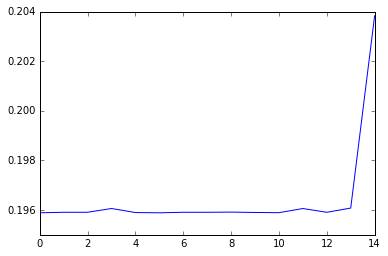

In [15]:
import pylab as plt
%matplotlib inline
L38_para = [i[0] for i in L38[0]]
L38_cost = [i[1] for i in L38[0]]
plt.plot(L38_cost)

In [4]:
L70 = parallel_rw_pkl(None, 'LC81220342016070LGN00'+'PSF', 'r')

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


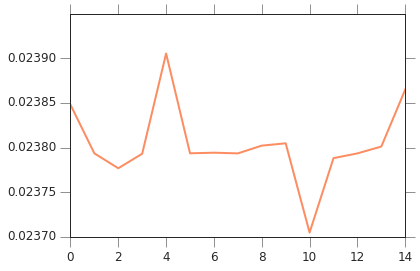

In [5]:
L70_para = [i[0] for i in L70[0]]
L70_cost = [i[1] for i in L70[0]]
plt.plot(L70_cost)

In [7]:
L70_para[10]

array([ 12.07059575,  14.50282544,  -0.260141  ,  32.41992188,   5.671875  ])

In [ ]:
L86 = parallel_rw_pkl(None, 'LC81220342016086LGN00'+'PSF', 'r')

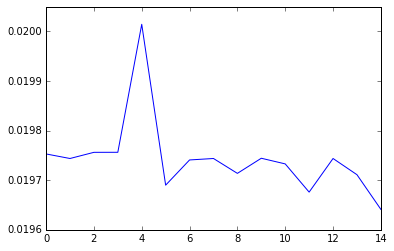

In [24]:
L86_para = [i[0] for i in L86[0]]
L86_cost = [i[1] for i in L86[0]]
plt.plot(L86_cost)

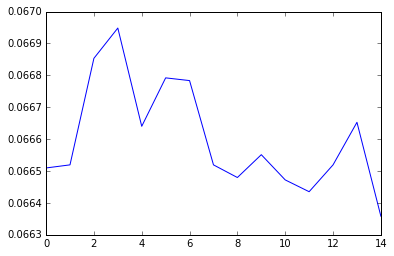

In [25]:
L134 = parallel_rw_pkl(None, 'LC81220342016134LGN00'+'PSF', 'r')
L134_para = [i[0] for i in L134[0]]
L134_cost = [i[1] for i in L134[0]]
plt.plot(L134_cost)

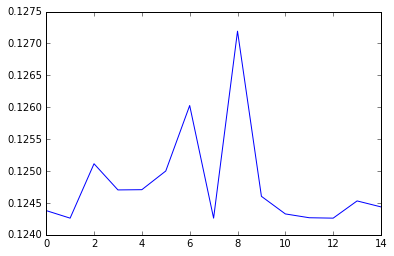

In [19]:
L150_para = [i[0] for i in L150[0]]
L150_cost = [i[1] for i in L150[0]]
plt.plot(L150_cost)

In [7]:
L38[1], L38[2]

(array([[[  2.82616283e-01,   2.65406676e-01,   2.86232565e-01, ...,
            2.46844954e-01,   2.63368088e-01,   3.02026850e-01],
         [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
            1.00000000e+00,   1.00000000e+00,   1.00000000e+00]],
 
        [[  2.82616283e-01,   2.65406676e-01,   2.86232565e-01, ...,
            2.46844954e-01,   2.63368088e-01,   3.03026850e-01],
         [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
            1.00000000e+00,   1.00000000e+00,   1.00000000e+00]],
 
        [[  2.83616283e-01,   2.65406676e-01,   2.86232565e-01, ...,
            2.39535983e-01,   2.63368088e-01,   3.03267839e-01],
         [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
            1.00000000e+00,   1.00000000e+00,   1.00000000e+00]],
 
        ..., 
        [[  1.82409893e-01,   1.81855830e-01,   1.98952649e-01, ...,
            6.76271477e+00,   2.51301547e-01,   2.59412009e-01],
         [  0.00000000e+00,   0.0000000

In [69]:
1.*((L38[3]<4)&(L38[3]>0)).sum()/L38[3].size,1.*((L70[3]<4)&(L70[3]>0)).sum()/L70[3].size,1.*((L86[3]<4)&(L86[3]>0)).sum()/L86[3].size

(0.04738201900969447, 0.4114570370984882, 0.22737633873369914)

In [70]:
1.*((L134[3]<4)&(L134[3]>0)).sum()/L134[3].size,1.*((L150[3]<4)&(L150[3]>0)).sum()/L150[3].size

(0.3399471316973092, 0.18381993213919356)

In [8]:
BRDF_16_days = L38[1]

(0, 16)

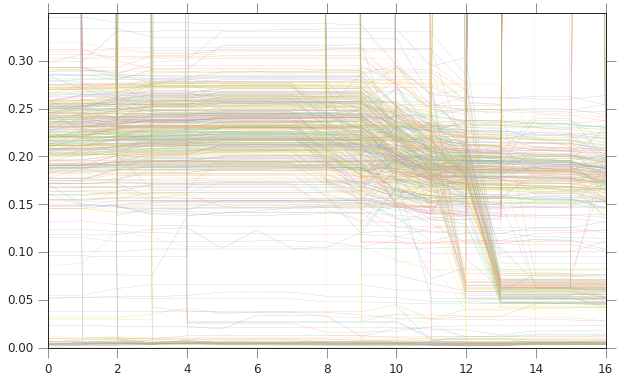

In [511]:
ran = np.random.choice(range(len(BRDF_16_days[0,0,:])), 500)
plt.figure(figsize=(10,6))
plt.plot(BRDF_16_days[:,0,ran], lw=0.2)
plt.ylim(0.,0.35)
plt.xlim(0,16)

(0, 16)

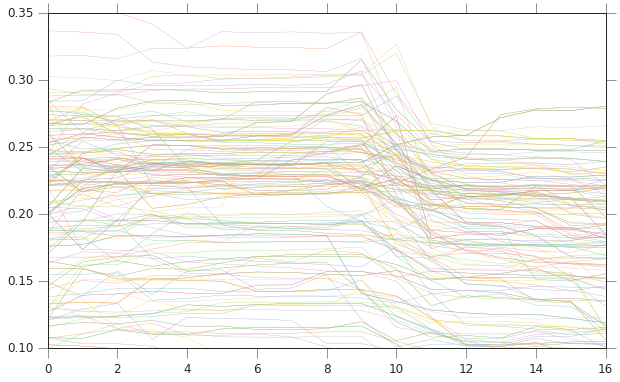

In [82]:
backward_8_days,mid_day, forward_8_days = BRDF_16_days[:8], BRDF_16_days[8], BRDF_16_days[9:]
all_high = BRDF_16_days[:,0,np.all(BRDF_16_days[:,1,:]==0, axis=0)]
ran = np.random.choice(range(len(all_high[0,:])), 500)
plt.figure(figsize=(10,6))
plt.plot(all_high[:,ran], lw=0.3)
plt.ylim(0.1,0.35)
plt.xlim(0,16)

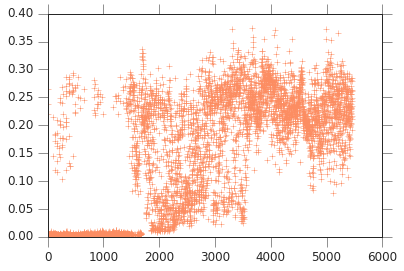

In [113]:
plt.plot(mid_day[0][mid_day[1]==0], '+')

In [116]:
mid_day[0][mid_day[1]==0]

array([ 0.26496552,  0.22080848,  0.00455018, ...,  0.2794252 ,
        0.24251348,  0.21066431])

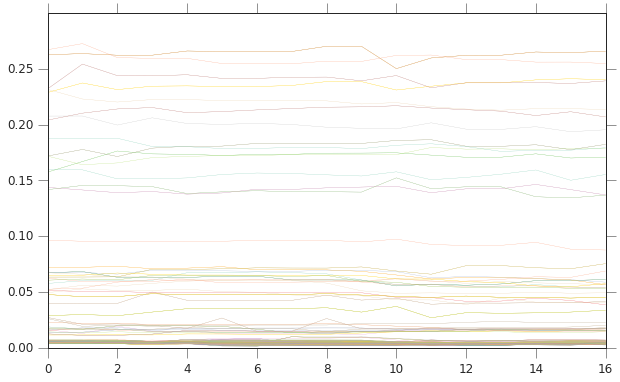

In [267]:
qa_mask_0 = np.all(BRDF_16_days[:,1,:]<=0, axis=0)
#all_high_qa = BRDF_16_days[:,0,qa_mask ]

stable_mask =  BRDF_16_days[:,0,:].std(axis=0)<0.005
filter_mask_0 = qa_mask_0&stable_mask

stable_brdf_0 = BRDF_16_days[:,0,filter_mask_0]

ran = np.random.choice(range(len(stable_brdf_0[0,:])), 500)
plt.figure(figsize=(10,6))
plt.plot(stable_brdf_0[:,ran], lw=0.2)
plt.ylim(0,0.3)
plt.savefig('image/stable_brdf_3_8_0.pdf')
#plt.xlim(0,16)
#plt.xlabel(np.arange(1,18))

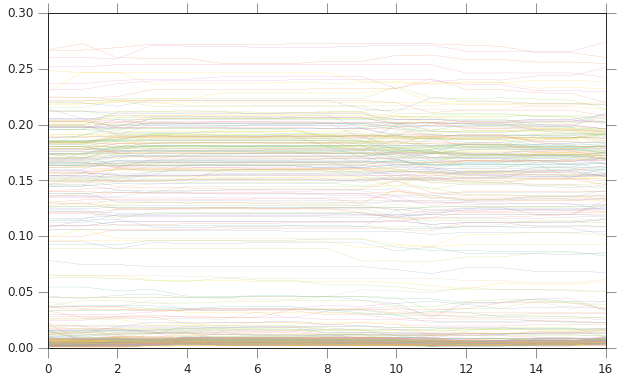

In [121]:
qa_mask_1 = np.all(BRDF_16_days[:,1,:]<=1, axis=0)
#all_high_qa = BRDF_16_days[:,0,qa_mask ]

stable_mask_1 =  BRDF_16_days[:,0,:].std(axis=0)<0.005
filter_mask_1 = qa_mask_1&stable_mask_1&np.all(BRDF_16_days[:,0,:]>=0, axis=0)

stable_brdf_1 = BRDF_16_days[:,0,filter_mask_1]

ran = np.random.choice(range(len(stable_brdf_1[0,:])), 500)
plt.figure(figsize=(10,6))
plt.plot(stable_brdf_1[:,ran], lw=0.2)
#plt.ylim(0,0.3)
plt.savefig('image/stable_brdf_3_8_1.pdf')
#plt.xlim(0,16)
#plt.xlabel(np.arange(1,18))

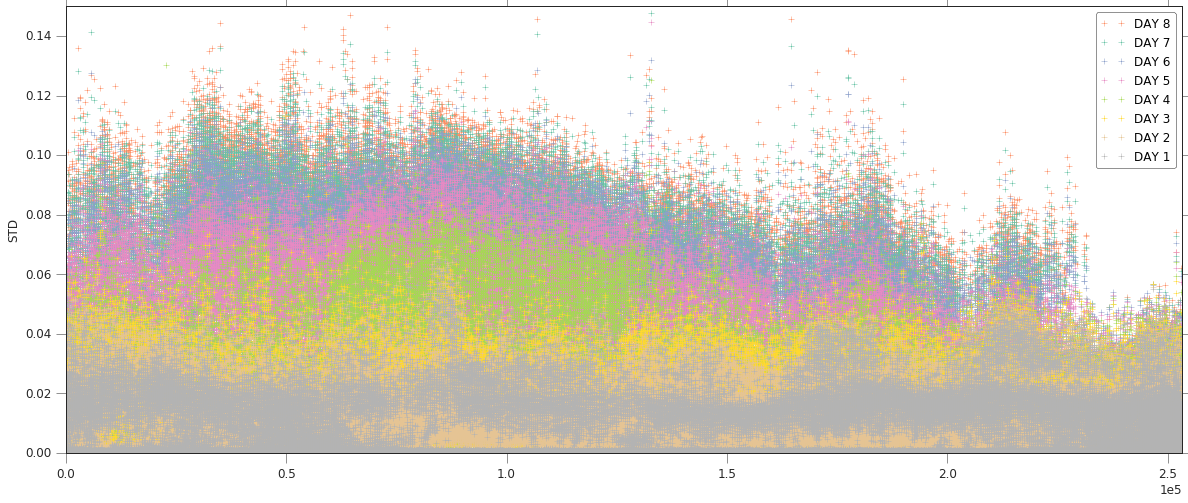

In [157]:
plt.figure(figsize=(20,8))
for i in [1,2,3,4,5,6,7,8][::-1]:
    plt.plot(BRDF_16_days[8-i:8+i+1,0,:].std(axis=0), '+', label = 'DAY %d'%i,rasterized=True)
    plt.ylim(0,0.15)
    plt.xlim(0,BRDF_16_days.shape[-1])
    plt.legend()
plt.ylabel('STD')
plt.savefig('image/16_days_std.pdf', dpi=400)

In [24]:
def read_meta(Hfile):
    
    with open(Hfile[:-4]+'_MTL.txt', 'r') as inF:
        for line in inF:
            if 'CLOUD_COVER ' in line:
                cloud_cover =  float(line.split('= ')[1])
    if cloud_cover<20:
        #print 'Less than 20% cloud.'
        b1 = gdal.Open(Hfile+'band1.tif').ReadAsArray()
        corners = b1.shape
        dic = {}
        with open(Hfile[:-4]+'_MTL.txt', 'r') as inF:
            for line in inF:
                if ('CORNER_' in line)&('LAT_PRODUCT' in line):
                    dic[line.split(' = ')[0].strip()[7:13]] = float(line.split(' = ')[1])
                elif ('CORNER_' in line)&('LON_PRODUCT' in line):
                    dic[line.split(' = ')[0].strip()[7:13]] = float(line.split(' = ')[1])
                elif 'ROLL_ANGLE' in line:
                    vza = float(line.split(' = ')[1])
                elif 'SUN_AZIMUTH' in line:
                    saa = float(line.split(' = ')[1])
                elif 'SUN_ELEVATION' in line:
                    sza = float(line.split(' = ')[1])
        with open('Landsat_azm.pkl', 'r') as savefile:
            Landsat_azm = pkl.load(savefile)

        vaa = np.nanmean(Landsat_azm[(Landsat_azm[:,2]==path)&(Landsat_azm[:,3]==row)].squeeze()[:2])
        
        return sza, saa, vza, vaa, dic, corners
    else:
        print 'To much cloud: ', cloud_cover
        return None  
sza, saa, vza, vaa, dic, corners = read_meta('l_data/LC81220342016038LGN00_sr_')
L_inds, H_inds = ML_geo_trans(lat, lon, dic, corners)
Lx, Ly = L_inds
Hx, Hy = H_inds

In [274]:
def update_mask(base_map, pre_mask, qa=0, start_point=4, thresh=0.02):
    for i in range(8):
        qa_mask = np.all(BRDF_16_days[8-i:8+i+1,1,:]<=qa, axis=0)
        std_mask = BRDF_16_days[8-i:8+i+1,0,:].std(axis=0)<=thresh
        valid_range_mask = np.all((BRDF_16_days[:,0,:]>0), axis=0) & np.all((BRDF_16_days[:,0,:]<1), axis=0)
        i_day_mask = qa_mask&std_mask&valid_range_mask
        current_mask = (~pre_mask)&i_day_mask
        base_map[current_mask] = i+start_point
        pre_mask = pre_mask|current_mask  
    return base_map, pre_mask

In [428]:
valid_range_mask = np.all(BRDF_16_days[:,0,:]>=0, axis=0)&(np.all(BRDF_16_days[:,0,:]<=1, axis=0))


qa_mask_0 = np.all(BRDF_16_days[8-4:8+5,1,:]<=0, axis=0)
stable_mask_0 =  BRDF_16_days[8-4:8+5,0,:].std(axis=0)<0.005
filter_mask_0 = qa_mask_0&stable_mask_0&valid_range_mask

qa_mask_1 = np.all(BRDF_16_days[8-4:8+5,1,:]<=1, axis=0)
stable_mask_1 =  BRDF_16_days[8-4:8+5,0,:].std(axis=0)<0.005
filter_mask_1 = qa_mask_1&stable_mask_1&valid_range_mask


base_mask = np.zeros(len(L_inds[0]))
current_mask = filter_mask_0
base_mask[current_mask] = 1
previous_mask = current_mask

current_mask = (~previous_mask)&filter_mask_1 #| ((mid_day[1]==0)&stable_mask)
base_mask[current_mask] = 2
previous_mask = previous_mask|current_mask

current_mask = (~previous_mask)&(mid_day[1]==0)&valid_range_mask
base_mask[current_mask] = 3
previous_mask = previous_mask|current_mask


std_mask = BRDF_16_days[8-4:8+5,0,:].std(axis=0)<=0.01
qa_mask = np.all(BRDF_16_days[8-4:8+5,1,:]<=1, axis=0)
current_mask = (~previous_mask)&std_mask&qa_mask&valid_range_mask
base_mask[current_mask] = 4
previous_mask = previous_mask|current_mask

#base_mask, pre_mask = update_mask(base_mask, previous_mask, qa=0, start_point=4,thresh=0.02)
#base_mask, _mask = update_mask(base_mask, previous_mask, qa=1, start_point=4,thresh=0.0005)

In [429]:
1.*(base_mask>0).sum()/base_mask.size

0.15797166718022865

(0, 0.5)

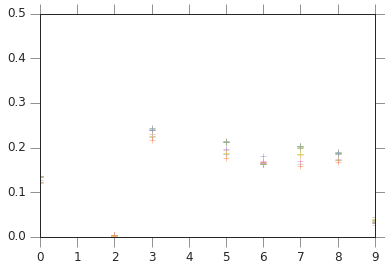

In [422]:
i = 8
std = BRDF_16_days[8-i:8+i+1,0,:].std(axis=0)
test = BRDF_16_days[8-i:8+i+1,0,std<0.02]
ran = np.random.choice(range(test.shape[-1]), 10)
plt.plot(test[:,ran].T, '+')
plt.ylim(0,0.5)

(0, 0.5)

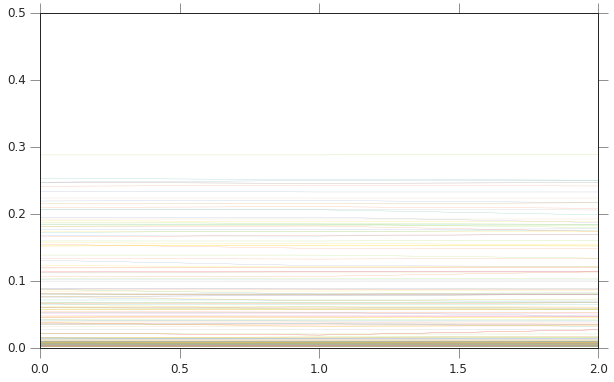

In [423]:
mask = base_mask==1
ran = np.random.choice(range(mask.sum()), 500)
plt.figure(figsize=(10,6))
plt.plot(BRDF_16_days[8-1:8+1+1,0,mask][:,ran], lw=0.2)
plt.ylim(0,0.5)
#plt.xlim(0,16)

(0, 0.5)

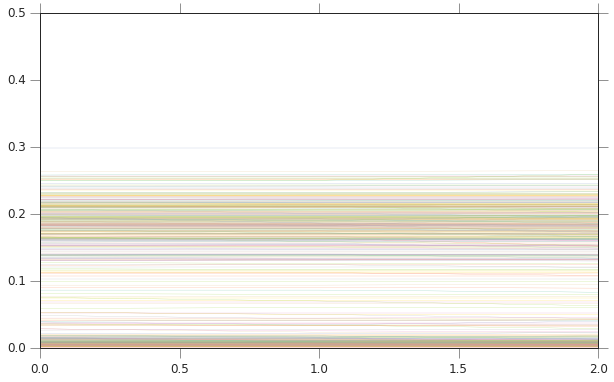

In [424]:
mask = base_mask==2
ran = np.random.choice(range(mask.sum()), 500)
plt.figure(figsize=(10,6))
plt.plot(BRDF_16_days[8-1:8+1+1,0,mask][:,ran], lw=0.2)
plt.ylim(0,0.5)
#plt.xlim(0,16)

(0, 0.5)

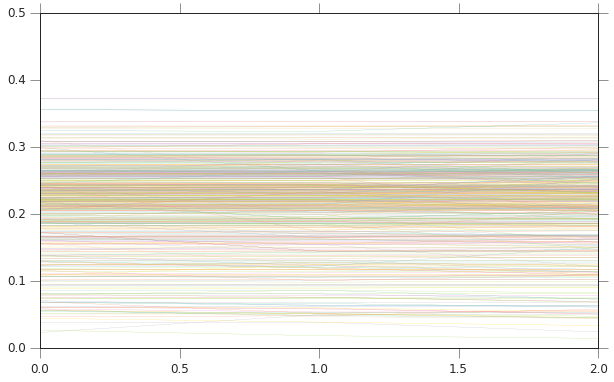

In [425]:
mask = base_mask==3
ran = np.random.choice(range(mask.sum()), 500)
plt.figure(figsize=(10,6))
plt.plot(BRDF_16_days[8-1:8+1+1,0,mask][:,ran], lw=0.2)
plt.ylim(0,0.5)
#plt.xlim(0,16)

(0, 0.5)

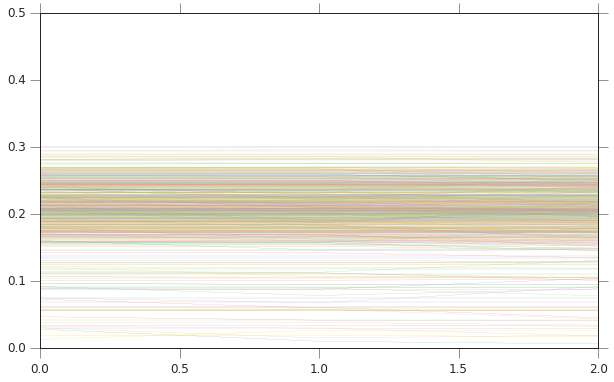

In [426]:
mask = base_mask==4
ran = np.random.choice(range(mask.sum()), 500)
plt.figure(figsize=(10,6))
plt.plot(BRDF_16_days[8-1:8+1+1,0,mask][:,ran], lw=0.2)
plt.ylim(0,0.5)

In [431]:
base_mask.shape, composite_brdf.shape

((253134,), (253134,))

In [434]:
(base_mask==1).shape

(253134,)

In [437]:
BRDF_16_days[8][0]

array([ 0.22752046,  0.20962227,  0.23389576, ...,  0.24998214,
        0.27302185,  0.30178586])

In [508]:
composite_brdf = np.zeros(base_mask.shape)
composite_brdf[:]=np.nan
composite_brdf[in_range] = BRDF_16_days[8,0,in_range]
#composite_brdf[base_mask==2] = BRDF_16_days[8,0,:][base_mask==2]
#composite_brdf[base_mask==3] = BRDF_16_days[8,0,:][base_mask==3]
#composite_brdf[base_mask==4] = BRDF_16_days[8,0,:][base_mask==4]

In [22]:
def cost1(shifts, s=None, L_data=None, shape = None):
    xs, ys = shifts 
    val = (Hx+xs<shape[0])&(Hy+ys<shape[1])
    shx, shy = (Hx+xs).astype(int), (Hy+ys).astype(int)
    Lvals, Hvals = L_data[val], s[shx[val], shy[val]]
    Lvals[np.isnan(Lvals)],Hvals[np.isnan(Hvals)]=-9999999, -9999999
    mas = (Lvals>0)&(Lvals<1)&(Hvals>0)&(Hvals<1)
    r = scipy.stats.linregress(Lvals[mas], Hvals[mas])
    return abs(1-r.rvalue)

def gaussian(xstd, ystd, angle, norm = True):
    win = int(round(max(3*xstd, 3*ystd)))
    winx = win*2**0.5
    winy = win*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-win/2: center[0]+win/2, center[1]-win/2:center[1]+win/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus 

def cost2(para, H_data=None, L_data=None, val_mask=None):
    xstd,ystd,angle, xs, ys = para 
    G = gaussian(xstd,ystd,angle,True)                              
    ss = signal.fftconvolve(H_data, G, mode='same')
    # remove the cloud pixel
    ss[~val_mask]=np.nan
    val = (Hx+xs<H_data.shape[0])&(Hy+ys<H_data.shape[1])
    shx, shy = (Hx+xs).astype(int), (Hy+ys).astype(int)
    Lvals, Hvals = L_data[val], ss[shx[val], shy[val]]
    Lvals[np.isnan(Lvals)],Hvals[np.isnan(Hvals)]=-9999999, -9999999
    mas = (Lvals>0)&(Lvals<1)&(Hvals>0)&(Hvals<1)
    r = scipy.stats.linregress(Lvals[mas], Hvals[mas])
    costs = abs(1-r.rvalue)
    return costs 

def op(p0):
    #p0 =  ps[ind]
    args = H_data, L_data, val_mask
    return optimize.fmin_l_bfgs_b(cost2, p0, approx_grad=1, iprint=-1, args=args, bounds=bounds,maxiter=250, maxfun=250)

In [19]:
Hfile = Hfiles[0].split('band')[0]
Hfile

'/data/store01/data_dirs/students/ucfafyi/S2_MODIS/l_data/LC81220342016038LGN00_sr_'

In [20]:
cloud = gdal.Open(Hfile[:-4]+'_cfmask.tif').ReadAsArray()
cl_mask = cloud==4 # cloud pixels; strictest way is to set the clear pixels with cloud==0
struct = ndimage.generate_binary_structure(2, 2)
dia_cloud = ndimage.binary_dilation(cl_mask, structure=struct, iterations=20).astype(cl_mask.dtype)

H_data = gdal.Open(Hfile+'band%d.tif'%7).ReadAsArray()*0.0001
mask = ~(H_data<0).astype('bool')
small_mask = ndimage.binary_erosion(mask, structure=struct, iterations=20).astype(mask.dtype)
val_mask = (~dia_cloud)&small_mask


avker = np.ones((40,40))
navker = avker/avker.sum()
s = signal.fftconvolve(H_data, navker, mode='same')
s[~val_mask]=np.nan

In [446]:
np.array([BRDF_16_days[8,1,:]==0]).sum()

5457

In [33]:
BRDF_16_days[8,1,:].shape[0]

253134

In [37]:
L_data = np.zeros(BRDF_16_days[8,1,:].shape[0])
L_data[:] = np.nan
L_data[BRDF_16_days[8,1,:]==0] = smothed[0][8][BRDF_16_days[8,1,:]==0] # composite_brdf

args = s, L_data, H_data.shape

retval0=0,0.2
for xstd0 in range(-30,30,15):
    for ystd0 in range(-30,30,15):
        p0 = np.array([xstd0, ystd0])
        retval = optimize.fmin(cost1, p0, full_output=1, args=args)
        if retval[1]<retval0[1]:
            retval0=retval

xs, ys = retval[0]
p0= 13, 32, 4, xs, ys
bounds = [5,100],[5,100],[-15,15],[xs-5,xs+5],[ys-5,ys+5]
#args = H_data, L_data, val_mask
#optimize.fmin_l_bfgs_b(cost2, p0, approx_grad=1, iprint=-1, args=args, bounds=bounds)

ps = [(5, 20, 5, xs, ys),(10, 20, 10, xs, ys), (20, 20, -5, xs, ys), (30, 20, 5, xs, ys),(40, 20, 10, xs, ys),
(10, 5, -5, xs, ys),(10, 10, 10, xs, ys), (10, 20, 5, xs, ys), (10, 30, -5, xs, ys),(10, 40, 0, xs, ys),
(10, 20, 0, xs, ys),(10, 20, 5, xs, ys), (10, 20, 15, xs, ys), (10, 20, -5, xs, ys),(10, 30, -10, xs, ys)]

#global H_data, L_data, val_mask, bounds, Hx, Hy, Lx, Ly

#retval = optimize.fmin_l_bfgs_b(cost2, p0, approx_grad=1, iprint=-1, args=args, bounds=bounds)
pool = multiprocessing.Pool(processes = 15)
retval = pool.map(op, ps)
pool.close()
pool.join()

#return retval, [BRDF_16_days, composite_brdf, base_mask], [s, H_inds]

Optimization terminated successfully.
         Current function value: 0.270236
         Iterations: 42
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.270236
         Iterations: 43
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.270308
         Iterations: 32
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.270236
         Iterations: 44
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.270308
         Iterations: 42
         Function evaluations: 108


KeyboardInterrupt: 

In [510]:
retval

[(array([ 29.49443235,  11.87482222, -15.        ,  15.75      ,  14.25      ]),
  0.069464817894938635,
  {'funcalls': 252,
   'grad': array([ -2.78665979e-06,   1.53133062e-04,   2.19002594e-04,
            0.00000000e+00,   0.00000000e+00]),
   'nit': 8,
   'task': 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT',
   'warnflag': 1}),
 (array([ 18.49936059,  17.72442621,  10.36186803,  15.75      ,  14.25      ]),
  0.078098064895288699,
  {'funcalls': 252,
   'grad': array([ -5.39934764e-04,   2.47679655e-04,   1.06137321e-05,
            0.00000000e+00,   0.00000000e+00]),
   'nit': 5,
   'task': 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT',
   'warnflag': 1}),
 (array([ 30.38291069,  12.56981218, -11.08122852,  15.75      ,  14.25      ]),
  0.087415978827199092,
  {'funcalls': 252,
   'grad': array([  1.00783826e-03,  -5.15687493e-04,  -5.43898260e-05,
            0.00000000e+00,   0.00000000e+00]),
   'nit': 6,
   'task': 'STOP: TOTAL NO. of f AND g EVALUATIONS E

In [442]:
retval0

(array([  2.92500000e+01,   5.06250000e-03]), 0.18251066548185635, 34, 84, 0)

In [484]:
pas = np.array([i[0] for i in retval])
cos = np.array([i[1] for i in retval])

In [485]:
pas[cos==cos.min()]

array([[ 16.49867838,  16.48962448,  -0.07334441,   0.38703918,   0.4854126 ]])

In [504]:
xstd,ystd,angle, xs, ys =   16.49867838,  16.48962448,  -0.07334441,   0.38703918,   0.4854126
G = gaussian(xstd,ystd,angle,True)                              
ss = signal.fftconvolve(H_data, G, mode='same')
# remove the cloud pixel
ss[~val_mask]=np.nan
val = (Hx+xs<H_data.shape[0])&(Hy+ys<H_data.shape[1])
shx, shy = (Hx+xs).astype(int), (Hy+ys).astype(int)
Lvals, Hvals = L_data[val], ss[shx[val], shy[val]]
mas = (Lvals>0)&(Lvals<1)&(Hvals>0)&(Hvals<1)
r = scipy.stats.linregress(Lvals[mas], Hvals[mas])
r

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


LinregressResult(slope=0.81950758287757208, intercept=0.032383364697602779, rvalue=0.91227250926372294, pvalue=0.0, stderr=0.0017557381459528502)

In [506]:
down, up = s[Hx, Hy]*0.9,s[Hx, Hy]*1.1

In [507]:
in_range = (BRDF_16_days[8,0,:]>down)&(BRDF_16_days[8,0,:]<up)&(BRDF_16_days[8,1,:]==0)

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In that way, it becomes too arbitry, need to smooth out those abrupt changes but still kepp the edges, which represent fast chanegs.


In [85]:
valid_range = (BRDF_16_days[:,0,:]>=0)&(BRDF_16_days[:,0,:]<=1)

In [88]:
magic = 0.618034
test = BRDF_16_days[:,0,:].copy()
test[~valid_range]=np.nan
W = magic**BRDF_16_days[:,1,:]
W[BRDF_16_days[:,1,:]>1]=0

In [89]:
smothed = smoothn(test, axis=0, isrobust=1, W =W, s=1)

(0, 16)

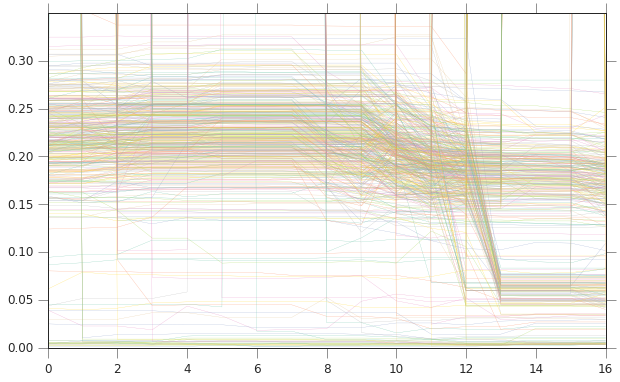

In [60]:
ran = np.random.choice(range(len(BRDF_16_days[0,0,:])), 500)
plt.figure(figsize=(10,6))
plt.plot(BRDF_16_days[:,0,ran], lw=0.2)
plt.ylim(0.,0.35)
plt.xlim(0,16)

(0, 16)

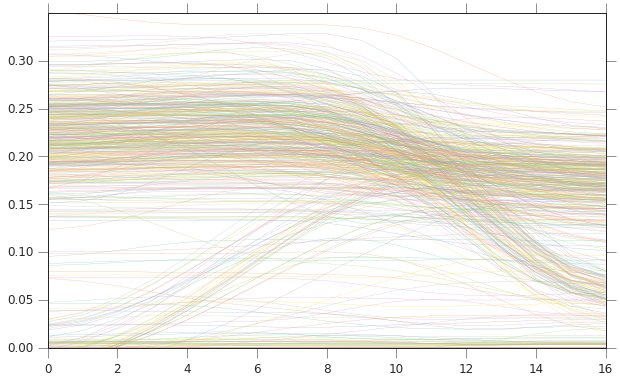

In [90]:
#ran = np.random.choice(range(len(BRDF_16_days[0,0,:])), 500)
plt.figure(figsize=(10,6))
plt.plot(smothed[0][:,ran], lw=0.2)
plt.ylim(0.,0.35)
plt.xlim(0,16)

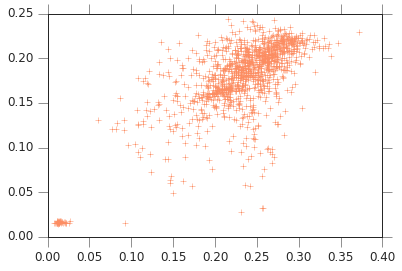

In [62]:
l,h = BRDF_16_days[8,0,:][valid_range[8]&(BRDF_16_days[8,1,:]<=0)], s[Hx, Hy][valid_range[8]&(BRDF_16_days[8,1,:]<=0)]
plt.plot(l,h, '+')

In [63]:
inval = np.isnan(l)|np.isnan(h)
r = scipy.stats.linregress(l[~inval], h[~inval])
r

LinregressResult(slope=0.57202487727333995, intercept=0.045882034899516949, rvalue=0.74496645998467625, pvalue=1.7085416232869175e-215, stderr=0.014707538278196592)

In [107]:
 ax.plot?

LinregressResult(slope=0.62898648349841357, intercept=0.033308047923051226, rvalue=0.82941082474534089, pvalue=1.2460092453259326e-98, stderr=0.021675608052182008)
LinregressResult(slope=0.62171066936907438, intercept=0.035100060744394396, rvalue=0.8117711344472609, pvalue=3.0294082536293553e-139, stderr=0.018459946839040644)
LinregressResult(slope=0.59748347578202654, intercept=0.042304448351148327, rvalue=0.7431593108654565, pvalue=1.1024812816376697e-183, stderr=0.016681218039472423)
LinregressResult(slope=0.57740779764856198, intercept=0.051444876614023305, rvalue=0.7302638452479967, pvalue=0.0, stderr=0.0099774758045641891)
LinregressResult(slope=0.57112277730040995, intercept=0.050310340967411382, rvalue=0.74319870038627178, pvalue=0.0, stderr=0.0098332558596543797)
LinregressResult(slope=0.58711383209300105, intercept=0.042455495636683965, rvalue=0.74447403980231985, pvalue=4.0023366968242297e-226, stderr=0.014739989925911828)
LinregressResult(slope=0.58053874934070293, intercep

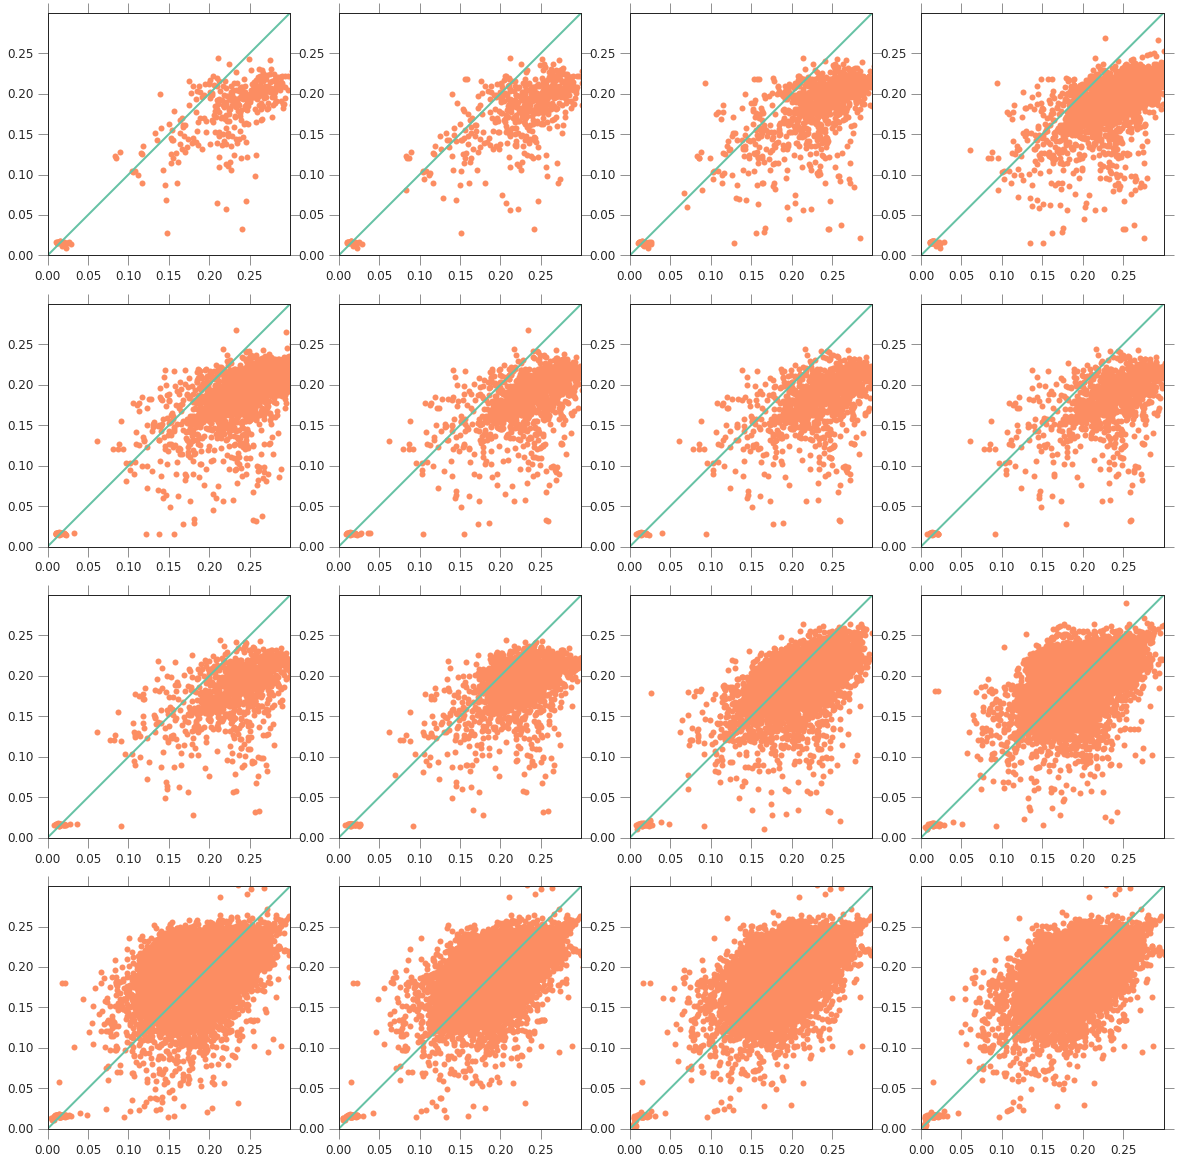

In [108]:
fig = plt.figure(figsize=(20,20))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    l,h = smothed[0][i][valid_range[i]&(BRDF_16_days[i,1,:]<=0)], s[Hx, Hy][valid_range[i]&(BRDF_16_days[i,1,:]<=0)]
    ax.plot(l,h, 'o', mew=0)
    ax.plot([0,1], [0,1])
    ax.set_xlim(0,0.3)
    ax.set_ylim(0,0.3)
    inval = np.isnan(l)|np.isnan(h)
    r = scipy.stats.linregress(l[~inval], h[~inval])
    print r